#### Masive Data Assignment
Read and Clean Data for several sensors 

In [41]:
import pandas as pd
import numpy as np
import json 

#### 1. Temperature File for (T-DHT22) sensor 

In [31]:
# Reading the file
t_DHT22 = pd.read_csv('../data/raw/T-DHT22-measures.csv', parse_dates = ['time'])
t_DHT22.head()

,sensor,value,time
0,T-DHT22,25.5,2017-12-19 14:07:18+00:00
1,T-DHT22,25.5,2017-12-19 14:07:25+00:00
2,T-DHT22,25.6,2017-12-19 14:07:32+00:00
3,T-DHT22,25.6,2017-12-19 14:07:38+00:00
4,T-DHT22,25.6,2017-12-19 14:07:45+00:00


In [107]:
# General Information 
t_DHT22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440150 entries, 0 to 1440149
Data columns (total 3 columns):
sensor    1440150 non-null object
value     1440150 non-null float64
time      1440150 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 33.0+ MB


we conclude from this, that this data file has 3 columns and each coulmn has 1440150 data value, and there in no missing data, also we can see the memory usage (33 MB)

In [108]:
# number of rows in the file
t_DHT22.sensor.value_counts()

T-DHT22    1440150
Name: sensor, dtype: int64

In [109]:
type(t_DHT22.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [110]:
# check and print the number of empty cells (missing data) in each coulmn 
t_DHT22.isnull().sum()

sensor    0
value     0
time      0
dtype: int64

In [111]:
t_DHT22.describe()

,value
count,1.440150e+06
mean,2.299986e+01
std,2.480804e+00
min,1.670000e+01
25%,2.170000e+01
50%,2.330000e+01
75%,2.480000e+01
max,2.980000e+01


T-DHT22-measures.csv file doesn't have problems. There's no missing data and each column has a same format.

### 2. Humidity File (H-DHT22) sensor 

In [112]:
# Reading H-DHT22 file
h_DHT22 = pd.read_csv('../data/raw/H-DHT22-measures.csv', parse_dates = ['time'])
h_DHT22.head()

,sensor,value,time
0,H-DHT22,15.7,2017-12-19 14:07:18+00:00
1,H-DHT22,15.7,2017-12-19 14:07:25+00:00
2,H-DHT22,15.7,2017-12-19 14:07:32+00:00
3,H-DHT22,15.7,2017-12-19 14:07:38+00:00
4,H-DHT22,15.7,2017-12-19 14:07:45+00:00


In [113]:
type(h_DHT22.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
h_DHT22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440160 entries, 0 to 1440159
Data columns (total 3 columns):
sensor    1440160 non-null object
value     1440160 non-null float64
time      1440160 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 33.0+ MB


From information above, the data frame has 1440160 rows and 3 columns. Each column has 1440150 data, there is no missing data.

In [115]:
h_DHT22.sensor.value_counts()

H-DHT22    1440160
Name: sensor, dtype: int64

In [17]:
# check and print the number of empty cells (missing data) in each coulmn 
h_DHT22.isnull().sum()

sensor    0
value     0
time      0
dtype: int64

File H-DHT22-measures.csv doesn't have any problem. There's no missing data and each column has a same format.

### 3. Merge temperature and humidity 

 
merging the temperature and humidity dataframs into one dataframe based on the time, and check the missing data after 

In [90]:
# Merge data frame base on time columns
newdf = pd.merge(t_DHT22, h_DHT22, on = 'time', how='outer')
# Set time as a index of data frame
newdf.set_index('time', inplace=True)
newdf.head()

,sensor_x,value_x,sensor_y,value_y
time,,,,
2017-12-19 14:07:18+00:00,T-DHT22,25.5,H-DHT22,15.7
2017-12-19 14:07:25+00:00,T-DHT22,25.5,H-DHT22,15.7
2017-12-19 14:07:32+00:00,T-DHT22,25.6,H-DHT22,15.7
2017-12-19 14:07:38+00:00,T-DHT22,25.6,H-DHT22,15.7
2017-12-19 14:07:45+00:00,T-DHT22,25.6,H-DHT22,15.7


In [116]:
#general information
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1522253 entries, 2017-12-19 14:07:18+00:00 to 2018-03-13 11:38:20+00:00
Data columns (total 4 columns):
sensor_x    1440150 non-null object
value_x     1522253 non-null float64
sensor_y    1440160 non-null object
value_y     1522253 non-null float64
dtypes: float64(2), object(2)
memory usage: 58.1+ MB


we conclude that the data frame after merging has 1522253 rows.
T_DHT22 and H_DHT22 respectively has 1440150 and 1440160 data
we have missing data in each column. 

In [117]:
# check and print the number of empty cells (missing data) in each coulmn 
newdf.isnull().sum()

sensor_x    82103
value_x         0
sensor_y    82093
value_y         0
dtype: int64

In [118]:
newdf.iloc[200:220]

,sensor_x,value_x,sensor_y,value_y
time,,,,
2017-12-19 15:47:36+00:00,T-DHT22,27.0,H-DHT22,2.000000
2017-12-19 15:47:43+00:00,T-DHT22,27.0,H-DHT22,2.000000
2017-12-19 15:47:50+00:00,T-DHT22,27.0,H-DHT22,1.800000
2017-12-19 15:47:56+00:00,T-DHT22,27.0,NaN,1.753846
2017-12-19 15:48:03+00:00,T-DHT22,27.0,H-DHT22,1.700000
2017-12-19 15:48:10+00:00,T-DHT22,27.0,H-DHT22,2.200000
2017-12-19 15:48:17+00:00,T-DHT22,27.0,H-DHT22,2.100000
2017-12-19 15:48:24+00:00,T-DHT22,27.0,H-DHT22,2.400000
2017-12-19 15:48:30+00:00,T-DHT22,27.0,H-DHT22,2.400000


In [119]:
# here we have used interpolation to handle the missing data 
newdf.interpolate(method='time', inplace=True)
newdf.iloc[200:220]

,sensor_x,value_x,sensor_y,value_y
time,,,,
2017-12-19 15:47:36+00:00,T-DHT22,27.0,H-DHT22,2.000000
2017-12-19 15:47:43+00:00,T-DHT22,27.0,H-DHT22,2.000000
2017-12-19 15:47:50+00:00,T-DHT22,27.0,H-DHT22,1.800000
2017-12-19 15:47:56+00:00,T-DHT22,27.0,NaN,1.753846
2017-12-19 15:48:03+00:00,T-DHT22,27.0,H-DHT22,1.700000
2017-12-19 15:48:10+00:00,T-DHT22,27.0,H-DHT22,2.200000
2017-12-19 15:48:17+00:00,T-DHT22,27.0,H-DHT22,2.100000
2017-12-19 15:48:24+00:00,T-DHT22,27.0,H-DHT22,2.400000
2017-12-19 15:48:30+00:00,T-DHT22,27.0,H-DHT22,2.400000


In [120]:
#statistical information of data frame
newdf.describe()

,value_x,value_y
count,1.522253e+06,1.522253e+06
mean,2.298896e+01,1.001344e+00
std,2.492273e+00,1.943594e-01
min,1.670000e+01,1.000000e+00
25%,2.170000e+01,1.000000e+00
50%,2.330000e+01,1.000000e+00
75%,2.480000e+01,1.000000e+00
max,2.980000e+01,9.990000e+01


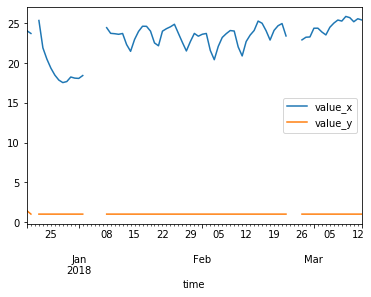

In [121]:
# plot the avarage temp based on the time 
%matplotlib inline
newdf.resample('D').mean().plot()

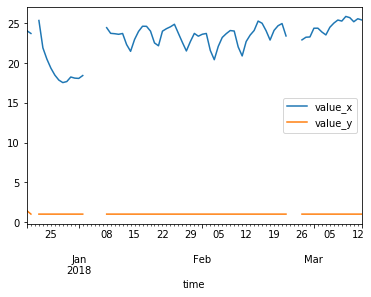

In [102]:
# plot the average humidity based on the time
newdf.resample('D').mean().plot()

as we can see we have missing data in temperature and humidity graphs,

#### 1. Temperature File for (T-DHT11) sensor 

In [33]:
# Reading the file
t_DHT11 = pd.read_csv('../data/raw/T-DHT11-measures.csv', parse_dates = ['time'])
t_DHT11.head()

,sensor,value,time
0,T-DHT11,27,2017-12-22 11:22:11+00:00
1,T-DHT11,28,2017-12-22 11:22:16+00:00
2,T-DHT11,28,2017-12-22 11:22:20+00:00
3,T-DHT11,28,2017-12-22 11:22:24+00:00
4,T-DHT11,28,2017-12-22 11:22:28+00:00


In [34]:
type(t_DHT11.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [78]:
# General Information 
t_DHT11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420308 entries, 0 to 1420307
Data columns (total 3 columns):
sensor    1420308 non-null object
value     1420308 non-null int64
time      1420302 non-null object
dtypes: int64(1), object(2)
memory usage: 32.5+ MB


In [79]:
# number of rows in the file
t_DHT11.sensor.value_counts()

T-DHT11    1420308
Name: sensor, dtype: int64

In [80]:
# check and print the number of empty cells (missing data) in each coulmn 
t_DHT11.isnull().sum()

sensor    0
value     0
time      6
dtype: int64

In [81]:
t_DHT11.describe()

,value
count,1.420308e+06
mean,2.124776e+01
std,2.492706e+00
min,1.500000e+01
25%,2.000000e+01
50%,2.200000e+01
75%,2.300000e+01
max,2.900000e+01


### 2. Humidity File (H-DHT11)


In [82]:
# reading the JSON file and convert it to csv 
data = []
with open('../data/raw/H-DHT11-measures.json','r') as f:
    for line in f:
        data.append(json.loads(line))

h_DHT11 = pd.DataFrame(data)
h_DHT11.to_csv (r'../data/raw/H-DHT11-measures.csv', index = None)
h_DHT11.head()

,sensor,value,time
0,H-DHT11,31,2017-12-22T11:22:11Z
1,H-DHT11,31,2017-12-22T11:22:16Z
2,H-DHT11,31,2017-12-22T11:22:20Z
3,H-DHT11,31,2017-12-22T11:22:24Z
4,H-DHT11,31,2017-12-22T11:22:28Z


In [83]:
type(h_DHT11.time[0])

str

In [84]:
h_DHT11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420302 entries, 0 to 1420301
Data columns (total 3 columns):
sensor    1420302 non-null object
value     1420302 non-null int64
time      1420302 non-null object
dtypes: int64(1), object(2)
memory usage: 32.5+ MB


In [123]:
#General Information
h_DHT11.sensor.value_counts()

H-DHT11    1420302
Name: sensor, dtype: int64

In [86]:
# check and print the number of empty cells (missing data) in each coulmn 
h_DHT11.isnull().sum()

sensor    0
value     0
time      0
dtype: int64

### 3. Merge temperature and humidity 


#### 1. Temperature File for (T-HTU21) sensor 

In [126]:
# reading the JSON file and convert it to csv 
data = []
with open('../data/raw/T-HTU21-measures.json','r') as f:
    for line in f:
        data.append(json.loads(line))

t_HTU21 = pd.DataFrame(data)
t_HTU21.to_csv (r'../data/raw/T-HTU21-measures.csv', index = None)
t_HTU21.head()

,sensor,value,time
0,T-HTU21,25.09,2017-12-20T12:17:05Z
1,T-HTU21,25.09,2017-12-20T12:17:07Z
2,T-HTU21,25.09,2017-12-20T12:17:09Z
3,T-HTU21,25.09,2017-12-20T12:17:11Z
4,T-HTU21,25.08,2017-12-20T12:17:13Z


In [127]:
type(t_HTU21.time[0])

str

In [128]:
t_HTU21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428383 entries, 0 to 1428382
Data columns (total 3 columns):
sensor    1428383 non-null object
value     1428383 non-null float64
time      1428383 non-null object
dtypes: float64(1), object(2)
memory usage: 32.7+ MB


In [134]:
t_HTU21.sensor.value_counts()

T-HTU21    1428383
Name: sensor, dtype: int64

In [130]:
# check and print the number of empty cells (missing data) in each coulmn 
t_HTU21.isnull().sum()

sensor    0
value     0
time      0
dtype: int64

#### 2. Humidity File for (T-HTU21) sensor 

In [131]:
# Reading the file
h_HTU21 = pd.read_csv('../data/raw/T-HTU21-measures.csv', parse_dates = ['time'])
h_HTU21.head()

,sensor,value,time
0,T-HTU21,25.09,2017-12-20 12:17:05+00:00
1,T-HTU21,25.09,2017-12-20 12:17:07+00:00
2,T-HTU21,25.09,2017-12-20 12:17:09+00:00
3,T-HTU21,25.09,2017-12-20 12:17:11+00:00
4,T-HTU21,25.08,2017-12-20 12:17:13+00:00


In [132]:
type(h_HTU21.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [135]:
# General Information 
h_HTU21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428383 entries, 0 to 1428382
Data columns (total 3 columns):
sensor    1428383 non-null object
value     1428383 non-null float64
time      1428383 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 32.7+ MB


In [136]:
h_HTU21.sensor.value_counts()

T-HTU21    1428383
Name: sensor, dtype: int64

In [137]:
# check and print the number of empty cells (missing data) in each coulmn 
h_HTU21.isnull().sum()

sensor    0
value     0
time      0
dtype: int64

### 3. Merge temperature and humidity 
